### 목표 : 생선 품종 분류 모델
- 데이터 : 2가지 품종의 생선 데이터 fish.csv
- 피  쳐 : Weight, Length
- 타  겟 : Species
- 유  형 : 지도학습 / 분류

(1) 모듈 로딩 & 데이터 준비  

In [1]:
import pandas as pd                                     # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier      # 기계학습 관련 모듈


In [4]:
data_file = '../data/fish.csv'

In [12]:
# 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols=[0,1,2])
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [14]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(['Bream','Smelt'])   # Boolean INdexing
fishDF[mask]

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [15]:
twoFishDF=fishDF[mask]
twoFishDF.index

# 인덱스 정리
twoFishDF.reset_index(drop=True, inplace=True)
twoFishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [43]:
## Bream, Smelt 품종명을 수치화
twoFishDF.loc[:,'Species']=twoFishDF['Species'].replace({'Bream':0, 'Smelt':1}).copy()
twoFishDF.Species.dtype, twoFishDF.head(3)

(dtype('int64'),
    Species  Weight  Length
 0        0   242.0    25.4
 1        0   290.0    26.3
 2        0   340.0    26.5)

In [44]:
twoFishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     int64  
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


(2) 데이터 전처리

In [16]:
# Weight, Length로 품종 구별이 가능한지 시각화 확인
import matplotlib.pyplot as plt

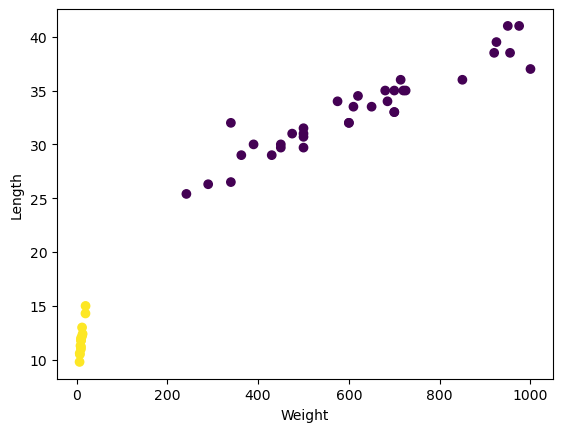

In [18]:
plt.scatter(x=twoFishDF.Weight, y=twoFishDF.Length, c=twoFishDF.Species)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

(3) 기계학습을 위한 데이터 준비
- 피쳐/특성 + 타겟/라벨/클래스
- 학습용 데이터셋 : 75%
- 테스트용 데이터셋 : 25%

(3-1) 직접 타겟/라벨 컬럼의 비율을 고려해서 학습&테스트용 데이터셋 준비

In [23]:
# 데이터 섞기 => 100% 모두 섞기
ret=twoFishDF.sample(frac=1.0)      # 100퍼센트(1.0) 다 섞기
print(ret.shape)
ret


(49, 3)


,Species,Weight,Length
46,1,12.2,13.0
4,0,430.0,29.0
1,0,290.0,26.3
22,0,620.0,34.5
21,0,685.0,34.0
41,1,10.0,11.8
35,1,6.7,9.8
36,1,7.5,10.5
0,0,242.0,25.4
33,0,975.0,41.0


In [20]:
# 학습과 테스트 비율 조절 갯수 계산
num = round(twoFishDF.shape[0] * 0.8)

# 학습 데이터 셋 추출
trainDF=twoFishDF.iloc[:num+1]
print(f'trainDF => {trainDF.shape}\n{trainDF.tail(3)}')

# 테스트 데이터셋 추출
testDF=twoFishDF.iloc[num+1:]
print(f'\ntrainDF => {testDF.shape}\n{testDF.tail(3)}')

trainDF => (40, 3)
    Species  Weight  Length
37        1     7.0    10.6
38        1     9.7    11.0
39        1     9.8    11.2

trainDF => (9, 3)
    Species  Weight  Length
46        1    12.2    13.0
47        1    19.7    14.3
48        1    19.9    15.0


(3-2) scikit-learn 모듈 활용한 학습&테스트용 데이터셋 준비
- 추가 모듈 로딩

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
# 특성과 타겟 분리
featureDF = twoFishDF[twoFishDF.columns[1:]]
targetSR = twoFishDF.Species

print(f'featureDF => ')

featureDF => 


In [31]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [전달] 피쳐 데이터, 타겟 데이터
## -- [기본] shuffle=True, train:test = 0.75:0.25         기본값이 3:1
## -- [반환] 학습요 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
X_train, X_test, y_train, y_test =  train_test_split(featureDF, targetSR)

In [28]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(X_train.head(2), y_train.head(2), sep='\n')

print(f'\nX_test : {X_test.shape}, y_test : {y_test.shape}')
print(X_test.head(2), y_test.head(2), sep='\n')

X_train : (36, 2), y_train : (36,)
    Weight  Length
21   685.0    34.0
1    290.0    26.3
21    0
1     0
Name: Species, dtype: int64

X_test : (13, 2), y_test : (13,)
    Weight  Length
0    242.0    25.4
17   700.0    33.0
0     0
17    0
Name: Species, dtype: int64


In [46]:
# 타겟/클래스 비율
print(f'{y_train.value_counts()/y_train.shape[0]}')
print(f'{y_test.value_counts()/y_test.shape[0]}')

Species
0    0.692308
1    0.307692
Name: count, dtype: float64
Species
0    0.8
1    0.2
Name: count, dtype: float64


In [29]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [전달] 피쳐 데이터, 타겟 데이터
## -- [기본] shuffle=True 
## -- [설정] train:test = 0.8:0.2 => test_size, train_size 매개변수 값 설정
## -- [반환] 학습요 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
X_train, X_test, y_train, y_test =  train_test_split(featureDF, targetSR, test_size=0.2)

In [30]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(X_train.head(2), y_train.head(2), sep='\n')

print(f'\nX_test : {X_test.shape}, y_test : {y_test.shape}')
print(X_test.head(2), y_test.head(2), sep='\n')

X_train : (39, 2), y_train : (39,)
    Weight  Length
25   725.0    35.0
45    13.4    12.4
25    0
45    1
Name: Species, dtype: int64

X_test : (10, 2), y_test : (10,)
    Weight  Length
26   720.0    35.0
15   600.0    32.0
26    0
15    0
Name: Species, dtype: int64


In [32]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [전달] 피쳐 데이터, 타겟 데이터
## -- [기본] shuffle=True 
## -- [설정] train:test = 0.9:0.1 => test_size, train_size 매개변수 값 설정
## --        분류의 경우 target이 불균형일 경우 비율 지정하는 stratify 매개변수를 target으로 설정
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
X_train, X_test, y_train, y_test =  train_test_split(featureDF, targetSR, test_size=0.1,
                                                     stratify=targetSR)

In [33]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(X_train.head(2), y_train.head(2), sep='\n')

print(f'\nX_test : {X_test.shape}, y_test : {y_test.shape}')
print(X_test.head(2), y_test.head(2), sep='\n')

X_train : (44, 2), y_train : (44,)
    Weight  Length
11   500.0    31.0
21   685.0    34.0
11    0
21    0
Name: Species, dtype: int64

X_test : (5, 2), y_test : (5,)
    Weight  Length
27   714.0    36.0
16   700.0    33.0
27    0
16    0
Name: Species, dtype: int64


In [34]:
### 검증용 데이터셋 준비
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,
                                                  stratify=y_train)

In [35]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(f'\nX_val : {X_val.shape}, y_test : {y_val.shape}')
print(f'\nX_test : {X_test.shape}, y_test : {y_test.shape}')


X_train : (39, 2), y_train : (39,)

X_val : (5, 2), y_test : (5,)

X_test : (5, 2), y_test : (5,)


(4) 학습 진행
- 학습 방법 : 지도학습 / 분류 => KNN
- 모델 인스턴스 생성 => fit() 메서드

In [36]:
# 모델 인스턴스 생성
model=KNeighborsClassifier()
model

KNeighborsClassifier()

In [37]:
# 학습 진행 => 학습용 데이터 진행
model.fit(X_train, y_train)

KNeighborsClassifier()

(5) 테스트 진행 => 학습에 사용되지 않는 데이터로 진행

In [38]:
model.score(X_val,y_val)

1.0

(6) 모델 활용 예측 => 새로운 데이터로 진행

In [40]:
print(model.predict(X_test))

[0 0 1 0 0]


In [41]:
y_test

27    0
16    0
47    1
3     0
14    0
Name: Species, dtype: int64

(6-1) 사용자로부터 전달받은 새로운 데이터로 대한 예측
==> 학습할때 전달되는 피쳐형태와 동일한 데이터

In [55]:
twoFishDF

,Species,Weight,Length
0,0,242.0,25.4
1,0,290.0,26.3
2,0,340.0,26.5
3,0,363.0,29.0
4,0,430.0,29.0
5,0,450.0,29.7
6,0,500.0,29.7
7,0,390.0,30.0
8,0,450.0,30.0
9,0,500.0,30.7


In [47]:
## 길이 25, 무게 160인 생선의 품종 예측 -----------------------------
new_data=pd.DataFrame([[160, 25]], columns=twoFishDF.columns[1:])

new_data

,Weight,Length
0,160,25


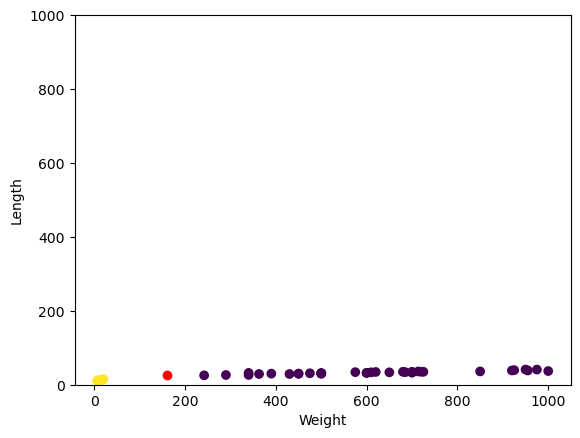

In [60]:
# 새로운 데이터와 학습 데이터의 시각화
plt.plot(new_data.Weight, new_data.Length, 'ro')

# 학습 데이터 시각화
plt.scatter(twoFishDF.Weight, twoFishDF.Length, c=twoFishDF.Species)
plt.ylabel('Length')
plt.xlabel('Weight')
plt.ylim(0, 1000)
plt.show()

In [53]:
# 생성된 모델로 새로운 범위의 품종 예측
model.predict(new_data)

array([1], dtype=int64)

In [58]:
# 새로운 데이터의 최근접 데이터 추출
_, index = model.kneighbors(new_data)
index.tolist()[0]

[20, 21, 10, 26, 38]

In [59]:
twoFishDF.iloc[index.tolist()[0]]

,Species,Weight,Length
20,0,575.0,34.0
21,0,685.0,34.0
10,0,475.0,31.0
26,0,720.0,35.0
38,1,9.7,11.0
